<a href="https://colab.research.google.com/github/4doctorstrange/4doctorstrange/blob/main/Label_gen(Vader).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
fp = open("/content/drive/MyDrive/journal_log/sample_40000","r")
data=[]
for line in fp:
  data.append(line.replace("\n",""))

for i in data[:5]:
  print(i)

data[0] = data[0].replace("=======>","")

=======> Size of sample is: 41825 
mar 03 02:23:24 info:   connect client status from conn_idx = 42, status = 0
attach_pci:1228 _ndevices =4
[info] ppm:setup:  => gppmctrlprotopppmodule
pcieport 0000:33:08.0: pciehp: timeout on hotplug command 0x1038 (issued 26805 msec ago)


In [ ]:
data_frame={
    "Sentences": data
}

In [ ]:
df = pd.DataFrame(data_frame)
df.head()

,Sentences
0,Size of sample is: 41825
1,mar 03 02:23:24 info: connect client status ...
2,attach_pci:1228 _ndevices =4
3,[info] ppm:setup: => gppmctrlprotopppmodule
4,pcieport 0000:33:08.0: pciehp: timeout on hotp...


In [ ]:
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Sentences"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Sentences"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Sentences"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["Sentences"]]
df.head(20)

,Sentences,Positive,Negative,Neutral,Compound
0,Size of sample is: 41825,0.000,0.0,1.000,0.0000
1,mar 03 02:23:24 info: connect client status ...,0.000,0.0,1.000,0.0000
2,attach_pci:1228 _ndevices =4,0.000,0.0,1.000,0.0000
3,[info] ppm:setup: => gppmctrlprotopppmodule,0.000,0.0,1.000,0.0000
4,pcieport 0000:33:08.0: pciehp: timeout on hotp...,0.000,0.0,1.000,0.0000
5,i2c i2c-10: added multiplexed i2c bus 82,0.000,0.0,1.000,0.0000
6,sib_pex_sw_init_config: sib1: fpga bringup suc...,0.487,0.0,0.513,0.5859
7,[info] ppm:slot-init: initialized slot informa...,0.000,0.0,1.000,0.0000
8,(root) cmd (/usr/evo/fpc_log_symlink.sh),0.000,0.0,1.000,0.0000
9,audit: type=1325 audit(1646334101.425:28): tab...,0.000,0.0,1.000,0.0000


In [ ]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df.head()

,Sentences,Positive,Negative,Neutral,Compound,Sentiment
0,Size of sample is: 41825,0.0,0.0,1.0,0.0,Neutral
1,mar 03 02:23:24 info: connect client status ...,0.0,0.0,1.0,0.0,Neutral
2,attach_pci:1228 _ndevices =4,0.0,0.0,1.0,0.0,Neutral
3,[info] ppm:setup: => gppmctrlprotopppmodule,0.0,0.0,1.0,0.0,Neutral
4,pcieport 0000:33:08.0: pciehp: timeout on hotp...,0.0,0.0,1.0,0.0,Neutral


In [ ]:
print(df["Sentiment"].value_counts())

Neutral     29040
Positive     6394
Negative     6392
Name: Sentiment, dtype: int64


In [ ]:
df_error = df[df["Sentiment"]=="Negative"]
df_error.head(5)

,Sentences,Positive,Negative,Neutral,Compound,Sentiment
27,performemfactions: alarm(location: /chassis[0]...,0.0,0.231,0.769,-0.4019,Negative
32,system_app_offline_event: app went offline re0...,0.0,0.273,0.727,-0.1280,Negative
35,system_app_offline_event: app went offline re0...,0.0,0.273,0.727,-0.1280,Negative
39,re0 kernel: pcieport 0000:00:0c.0: dpc: error ...,0.0,0.130,0.870,-0.4019,Negative
41,system_app_offline_event: app went offline fpc...,0.0,0.273,0.727,-0.1280,Negative


In [ ]:
df["isError"] = [ 1 if x=="Negative"  else 0 for x in df["Sentiment"] ]
print(df["isError"].value_counts())


0    35434
1     6392
Name: isError, dtype: int64


In [ ]:
df.head()

,Sentences,Positive,Negative,Neutral,Compound,Sentiment,isError
0,Size of sample is: 41825,0.0,0.0,1.0,0.0,Neutral,0
1,mar 03 02:23:24 info: connect client status ...,0.0,0.0,1.0,0.0,Neutral,0
2,attach_pci:1228 _ndevices =4,0.0,0.0,1.0,0.0,Neutral,0
3,[info] ppm:setup: => gppmctrlprotopppmodule,0.0,0.0,1.0,0.0,Neutral,0
4,pcieport 0000:33:08.0: pciehp: timeout on hotp...,0.0,0.0,1.0,0.0,Neutral,0


Removing other columns

In [ ]:
df.drop(['Positive', 'Negative',"Neutral", "Compound"], axis = 1,inplace = True)
df.shape

(41826, 3)

Saving DF in csv

In [ ]:
with open("/content/drive/MyDrive/journal_log/DF_Vader.csv",'w') as f:
  df.to_csv(f)

Taking samples and balancing it

In [ ]:
df_error = df[df['isError']==1].sample(3000)
df_error.shape
df_error.head()

,Sentences,Sentiment,isError
9174,getfattr: .python-2.7_yocto_2.2_x86_64_fpc.fs....,Negative,1
5130,sysctl kern.corefile not supported,Negative,1
35834,pam_unix(sshd:auth): authentication failure; l...,Negative,1
36582,/lib/udev/rules.d/50-udev-default.rules:60 unk...,Negative,1
9978,pci_pio[79.00.00]: failed to locate cb(0x7f372...,Negative,1


In [ ]:
df_not_error = df[df["isError"]==0].sample(6000)
df_not_error.shape

(6000, 3)

In [ ]:
df_balanced = pd.concat([df_error,df_not_error])
df_balanced.shape

(9000, 3)

Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_balanced['Sentences'],df_balanced['isError'], stratify=df_balanced['isError'])


In [ ]:
!python -m pip install tensorflow_text

In [ ]:
import tensorflow as tf
import tensorflow_hub as  hub
import tensorflow_text as text


In [ ]:

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)


In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
211/211 [==============================] - 2579s 12s/step - loss: 0.6053 - accuracy: 0.6686 - precision: 0.5108 - recall: 0.1369
Epoch 2/5
211/211 [==============================] - 2568s 12s/step - loss: 0.5361 - accuracy: 0.7221 - precision: 0.7169 - recall: 0.2747
Epoch 3/5
211/211 [==============================] - 2567s 12s/step - loss: 0.4932 - accuracy: 0.7653 - precision: 0.7761 - recall: 0.4160
Epoch 4/5
211/211 [==============================] - 2568s 12s/step - loss: 0.4636 - accuracy: 0.7979 - precision: 0.7973 - recall: 0.5280
Epoch 5/5
211/211 [==============================] - 2563s 12s/step - loss: 0.4404 - accuracy: 0.8188 - precision: 0.8145 - recall: 0.5911


In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 858s 12s/step - loss: 0.4131 - accuracy: 0.8462 - precision: 0.8495 - recall: 0.6547


[0.4130564033985138,
 0.8462222218513489,
 0.8494809865951538,
 0.6546666622161865]

In [ ]:
y_predicted = model.predict(x_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[1413,   87],
       [ 259,  491]])

Text(33.0, 0.5, 'Truth')

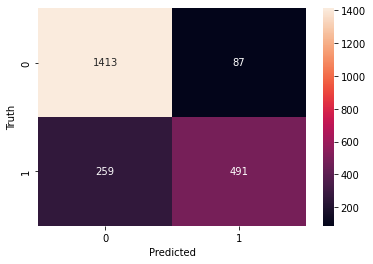

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1500
           1       0.85      0.65      0.74       750

    accuracy                           0.85      2250
   macro avg       0.85      0.80      0.82      2250
weighted avg       0.85      0.85      0.84      2250



Saving model on drive

In [ ]:
import pickle
with open('/content/drive/MyDrive/journal_log/Model_Vader','wb') as file:
    pickle.dump(model,file)

INFO:tensorflow:Assets written to: ram://c6b7bb6b-5202-4fcf-928d-780531c97530/assets


INFO:tensorflow:Assets written to: ram://c6b7bb6b-5202-4fcf-928d-780531c97530/assets
